In [1]:
import warnings

warnings.filterwarnings("ignore")
import os

if "jbook" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))
FORCE = False

# Text Quality Analysis (TQA) 
Aspect-based sentiment analysis (ABSA) model self-training and fine-tuning requires text saturated with explicit aspects and opinions words. Dense, unambiguous, aspect-rich reviews are especially vital during ABSA model self-training and pseudo-labeling. Explicit aspect-opinion pair relationships minimize noise and reinforce the model’s understanding of aspect-sentiment associations. Here, we assess the degree to which each review manifests this richness, enabling targeted sample selection for optimal self-training and ABSA model fine-tuning. 

## Text Quality Scoring 
Text quality in our context is less about fluency or lexical sophistication in the traditional linguistic sense; we're not grading essays. Instead, we focus on whether reviews contain clear aspects and opinions, reflected through specific syntactic features, such as the density of nouns, adjectives, verbs, and adverbs. Our scoring method assigns weighted values to key syntactic components that drive aspect-based sentiment analysis. We calculate the **Syntactic Score** using the formula:

$$
\text{Syntactic Score} = 0.3 \times \text{Noun Density} + 0.3 \times \text{Adjective Density} + 0.2 \times \text{Verb Density} + 0.2 \times \text{Adverb Density}
$$

Here, nouns $w_N = 0.3$ anchor aspect identification, while adjectives $w_A = 0.3$ capture sentiment polarity. Verbs $w_V = 0.2$ add contextual sentiment nuances, and adverbs $w_{ADV} = 0.2$ convey intensity. We combine this **Syntactic Score** with a **Lexical Diversity Score (TTR)** to derive a comprehensive **Text Quality Score**:

$$
\text{Text Quality Score Raw} = \alpha \cdot \text{Syntactic Score} + \beta \cdot \text{Lexical Diversity Score (TTR)}
$$

where $\alpha=0.5$ and $\beta=0.5$ adjust the relative importance of syntactic richness and lexical diversity, respectively.

Finally, we scale $\text{Text Quality Score}$ to the range $[0,100]$

## Import Libraries

In [2]:
import pandas as pd
from discover.app.tqa import TextQualityAnalysis
from discover.container import DiscoverContainer
from discover.infra.config.flow import FlowConfigReader
from discover.core.flow import StageDef
from discover.assets.idgen import AssetIDGen
from discover.flow.data_prep.tqa.stage import TQAStage
from discover.core.flow import PhaseDef, StageDef

pd.options.display.max_colwidth = 200

## Dependency Container

In [3]:
container = DiscoverContainer()
container.init_resources()
container.wire(
    modules=[
        "discover.flow.stage.base",
    ],
)

## Text Quality Analysis Pipeline
You know the script. We obtain the configuration, instantiate and run the `TQAStage` stage object. 

In [4]:
# Obtain the configuration
reader = FlowConfigReader()
stage_config = reader.get_stage_config(phase=PhaseDef.DATAPREP, stage=StageDef.TQA)

# Build and run Data Ingestion Stage
stage = TQAStage.build(stage_config=stage_config, force=FORCE, return_dataset=False)
dataset = stage.run()



# ============================================================================== #
#                          Text Quality Analysis Stage                           #
# ============================================================================== #



your 131072x1 screen size is bogus. expect trouble


:: loading settings :: url = jar:file:/home/john/miniconda3/envs/appvocai/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/john/.ivy2/cache
The jars for the packages stored in: /home/john/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-a61b6815-805f-4751-a908-f372473c58e5;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;5.3.3 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-s3;1.12.500 in central
	found com.amazonaws#aws-java-sdk-kms;1.12.500 in central
	found com.amazonaws#aws-java-sdk-core;1.12.500 in central
	found commons-logging#commons-logging;1.1.3 in central
	found commons-codec#commons-codec;1.15 in central
	found org.apache.httpcomponents#httpclient;4.5.13 in central
	found org.apache.httpcomponents#httpcore;4.4.13 in central
	found software.amazon.ion#ion-java;1.0.2 in central
	found joda-time#joda-time;2.8.1 in central
	found com.amazonaws#jmespath-java;1.12.500 in central
	f



                                    NLPTask                                     
                                    -------                                     
                          Start Datetime | Tue, 19 Nov 2024 13:27:41
pos_ud_ewt download started this may take some time.
Approximate size to download 2.2 MB
[ | ]pos_ud_ewt download started this may take some time.
Approximate size to download 2.2 MB
Download done! Loading the resource.
[ / ]

[OK!]
                       Complete Datetime | Tue, 19 Nov 2024 13:28:04
                                 Runtime | 22.37 seconds


                             ComputeTextQualityTask                             
                             ----------------------                             
                          Start Datetime | Tue, 19 Nov 2024 13:28:04
                       Complete Datetime | Tue, 19 Nov 2024 13:28:05
                                 Runtime | 1.2 seconds




                          Text Quality Analysis Stage                           
                           Stage Started | Tue, 19 Nov 2024 13:27:16
                         Stage Completed | Tue, 19 Nov 2024 13:29:41
                           Stage Runtime | 2.0 minutes and 25.0 seconds


# ============================================================================ #



## Text Quality and Relevance
Here, we inductively assess the degree to which: 
1. Low text quality scores reflect low quality reviews.
2. High scores indicate dense and diverse aspect and opinion rich reviews.
3. A threshold separating relevant from irrelevant reviews can be determined.

First, lets get an overall sense of the centrality, spread and shape of text quality scores in the dataset.

In [5]:
repo = container.repo.dataset_repo()
asset_id = AssetIDGen.get_asset_id(
    asset_type="dataset", phase=PhaseDef.DATAPREP, stage=StageDef.TQA, name="review"
)
dataset = repo.get(asset_id=asset_id, distributed=False, nlp=False)

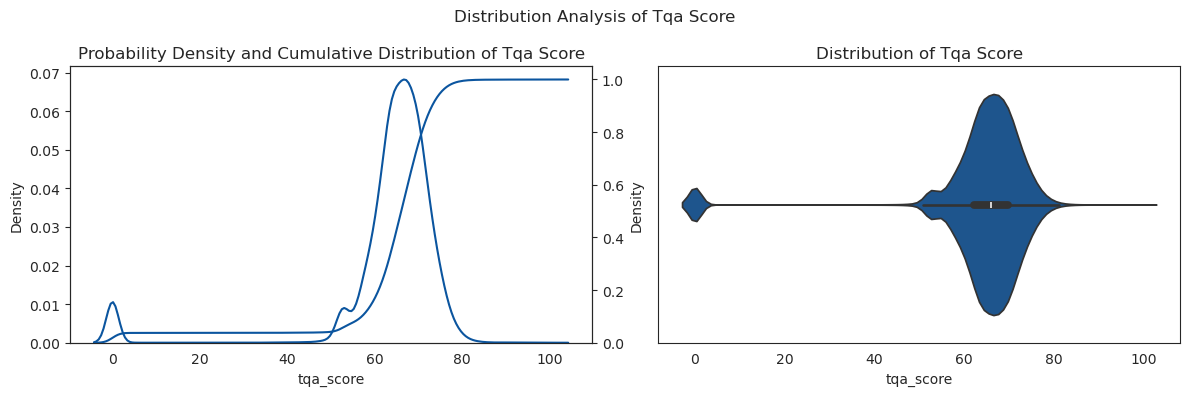

,count,mean,std,min,25%,50%,75%,max
tqa_score,86705.0,63.620653,13.717453,0.0,62.173079,66.086241,69.77129,100.0


In [6]:
tqa = TextQualityAnalysis(df=dataset.content)
tqa.distribution(x="tqa_score")

Analysis here

### Low Quality Reviews

In [7]:
tqa.select(
    n=10,
    x="tqa_score",
    sort_by="tqa_score",
    ascending=True,
    cols=["id", "app_name", "tqa_score", "content"],
)

,id,app_name,tqa_score,content
0,9053214662,Yubo : Make new friends,0.0,Magnifique !!
1,6764581121,SmartThings,0.0,🔥🔥🔥
2,8136926908,Google Photos,0.0,محرم بك
3,9239140006,VPN cat master - express proxy,0.0,更新ios16之后就用不了了
4,9199305860,Kika Keyboard - Custom Themes,0.0,𝓣𝓱𝓪𝓷𝓴 𝓨𝓸𝓾 ❤️
5,9156805292,QQ邮箱,0.0,一个邮件客户端，老让我绑定手机号干什么，你们脑子有病吗？
6,5989928571,Google Classroom,0.0,Bad
7,8052882290,"YouTube: Watch, Listen, Stream",0.0,Ta bien
8,9002384087,Font Keyboard - Good Fonts,0.0,𝐁𝐞𝐚𝐮𝐭𝐲
9,5953820193,Schoology,0.0,no


### High Quality Reviews

In [8]:
tqa.select(
    n=10,
    x="tqa_score",
    sort_by="tqa_score",
    ascending=False,
    cols=["id", "app_name", "tqa_score", "content"],
)

,id,app_name,tqa_score,content
0,7794278820,Sổ sức khỏe điện tử,100.000000,"xin chào! khi chúng tôi tải app về thì tiêu chí đầu tiên là app đó có sử dụng cho nhu cầu của mình ko? Thời gian qua bạn biết, tôi biết … nó như thế nào! Tôi rất trân trọng những gì các bạn đã là..."
1,6211311967,Quran Majeed – القران الكريم,99.835646,بسم الله الرحمن الرحيم Application très sophistiquée Il faut faire attention à certaines annonces publicitaires inappropriées جعل الله هذا العمل في ميزان حسناتكم و السلام عليكم
2,9700650399,Fonts,98.981463,𝒯𝒽𝒾𝓈 𝒾𝓈 𝓂𝓎 𝒻𝒶𝓋 𝒶𝓅𝓅 𝒾𝓉𝓈 𝓈ℴ 𝒸𝓊𝓉ℯ 𝒷𝓊𝓉 𝓎ℴ𝓊 𝓈𝒽ℴ𝓊𝓁𝒹 𝓂𝒶𝓀ℯ 𝓇𝒽ℯ 𝒻ℴ𝓃𝓉𝓈 𝒻𝓇ℯℯ！ 𝒿𝓊𝓈𝓉 𝒶 ℐ𝒹ℯ𝒶
3,8112314936,Fonts,98.159331,S͜͡o͜͡ f͜͡i͜͡g͜͡u͜͡r͜͡i͜͡n͜͡g͜͡ o͜͡u͜͡t͜͡ h͜͡o͜͡w͜͡ t͜͡o͜͡ g͜͡e͜͡t͜͡ t͜͡h͜͡e͜͡ f͜͡o͜͡n͜͡t͜͡s͜͡ t͜͡u͜͡r͜͡n͜͡e͜͡d͜͡ o͜͡n͜͡ i͜͡s͜͡ a͜͡ b͜͡i͜͡t͜͡ d͜͡i͜͡f͜͡f͜͡i͜͡c͜͡u͜͡l͜͡t͜͡ o͜͡t͜͡h͜͡e͜͡r͜͡ t͜͡h͜͡a͜͡n...
4,6636672241,Fonts % - Buzzer Fonts,98.035168,I ᒪOᐯᗴ TᕼIᔕ ᗩᑭᑭ! 𝙴𝚟𝚎𝚛𝚢𝚘𝚗𝚎 𝙸 𝚔𝚗𝚘𝚠 𝚒𝚜 𝚝𝚛𝚢𝚒𝚗𝚐 𝚝𝚘 𝚏𝚒𝚐𝚒𝚎 𝚘𝚞𝚝 𝚑𝚘𝚠 𝙸'𝚖 𝚍𝚘𝚒𝚗𝚐 𝚒𝚝! M̰̃ỹ̰ s̰̃t̰̃ṵ̃ḛ̃ñ̰s̰̃ c̰̃ã̰ñ̰'t̰̃ ã̰l̰̃l̰̃ õ̰f̰̃ m̰̃ỹ̰ s̰̃t̰̃ṵ̃d̰̃ḛ̃ñ̰t̰̃s̰̃ 𝕒𝕣𝕖 𝕘𝕖𝕥𝕥𝕚𝕟𝕘 𝕒 𝕜𝕚𝕔𝕜 𝕦𝕥 𝕠𝕗𝕚𝕥! T༙h༙a...
5,8513630282,Font Keyboard - Good Fonts,97.227771,ỉ ꪶꪮꪜꫀ ᡶꫝỉక ꪖᩏᩏ ỉꪹ ỉక ꪜꫀꪹꪗ ᦋꪮꪮᦔ αɳԃ ƚԋҽʂҽ ϝσႦƚʂ ιɱ υʂιɳɠ αɾҽ ϝɾσɳ ιƚ
6,5775809058,Fonts,97.227771,𝕀 𝕝𝕠𝕧𝕖 ᴀʟʟ ᴛʜᴇ ғᴏɴᴛs ᗩᑎᗪ ᔕTᑌᑕᒍᗴᖇᔕ 𝑌𝑜𝑢 𝑠ℎ𝑜𝑢𝑙𝑑 𝑔𝑒𝑡 𝑡ℎ𝑖𝑠 𝑎𝑝𝑝ⓎⒺⓅ Ⓤ ⓇⒺⒶⓁⓁⓎ ⓈⒽⓄⓊⓁⒹ 🄱🅈🄴✞✞✞✞シシシシシ☾☾☾♥︎♥︎♥︎♥︎♥︎♡︎♡︎♡︎♡︎♡︎𓆉𓆉𓆉𓆉𓆉𓆉𓆈꧁꧂꧁꧂꧁꧂꧁꧂☮︎︎☮︎︎☮︎︎☮︎︎☮︎︎
7,8178117570,Duolingo - Language Lessons,96.623035,Duolingo sans toi je ne serai rien je suis en République dominicaine et j’ai appris à parler espagnol avec toi pas avec mon école bon j’abuse mais j’ai eu de bonnes notes à l’école avec Duolingo ...
8,8999508559,Fonts,96.469482,𝕋𝕙𝕚𝕤 𝕒𝕡𝕡 𝕚𝕤 𝕘𝕣𝕖𝕒𝕥 ! 𝕋𝕙𝕒𝕥𝕤 𝕨𝕙𝕪 𝕀’𝕞 𝕦𝕤𝕚𝕟𝕘 𝕚𝕥 𝕓𝕦𝕥 𝕀 𝕔𝕒𝕟𝕥 𝕗𝕚𝕘𝕦𝕣𝕖 𝕠𝕦𝕥 𝕙𝕠𝕨 𝕥𝕠 𝕥𝕖𝕩𝕥 𝕡𝕖𝕠𝕡𝕝𝕖 𝕨𝕚𝕥𝕙 𝕚𝕥
9,5900260090,Better Font-s Cool Keyboard-s,95.037423,ṭһıṡ ѧƿƿ ıṡ ċȏʟʟ ɞȗṭ ṭһє ȏṅʟʏ ṭһıṅɢ ı ԁȏṅṭ ʟıҡє ıṡ ṭһѧṭ ʏȏȗ һѧṿє ṭȏ ƿѧʏ


## Summary and Transition to the Data Quality Analysis (DQA):
With the **Text Quality Analysis (TQA) Pipeline** now complete, we have the linguistic elements that contribute to a holistic assessment of text quality for NLP applications. These enriched text quality measures are determinative inputs for our next stage: the **Data Quality Analysis (DQA)**. 

In the DQA, we’ll dilate our aperture, integrating sentiments, typographical, and linguistic metrics across several dimensions of data quality, allowing us to uncover areas of concern, and devise further data processing interventions. 